<a href="https://colab.research.google.com/github/Akash-infant/PCOS-DETECTION-USING-MACHINE-LEARNING/blob/main/miniproject_using_amalgamation_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [ ]:
data=pd.read_csv("finaldataset.csv")

In [ ]:
x=data.drop(['PCOS'],axis=1)
y=data.PCOS

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(x,y,random_state=104,test_size=0.25,shuffle=True)

In [ ]:
#Random forest:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion="entropy")

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))

confusion matrix [[250   1]
 [  5  16]]
Accuracy: 0.9779411764705882
F1 score: 0.8421052631578947
Recall: 0.7619047619047619
Precision: 0.9411764705882353


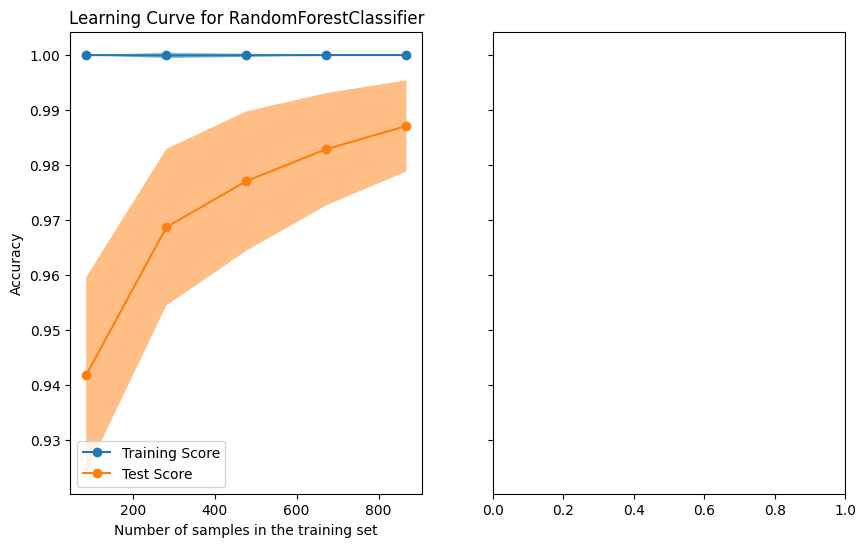

In [ ]:
#learning curve for Random forest

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
#Gradient Boosting:

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=1)
gbc.fit(X_train, np.ravel(y_train, order='C'))
y_pred = gbc.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))


confusion matrix [[251   0]
 [  4  17]]
Accuracy: 0.9852941176470589
F1 score: 0.8947368421052632
Recall: 0.8095238095238095
Precision: 1.0


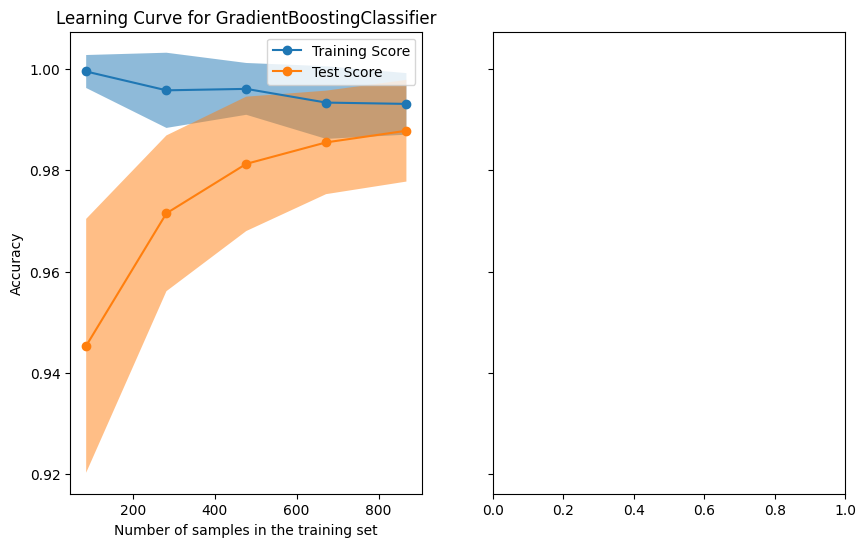

In [ ]:
#learning curve for Gradient boosting

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([gbc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
# k nearest neighbour

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))

confusion matrix [[250   1]
 [ 16   5]]
Accuracy: 0.9375
F1 score: 0.37037037037037035
Recall: 0.23809523809523808
Precision: 0.8333333333333334


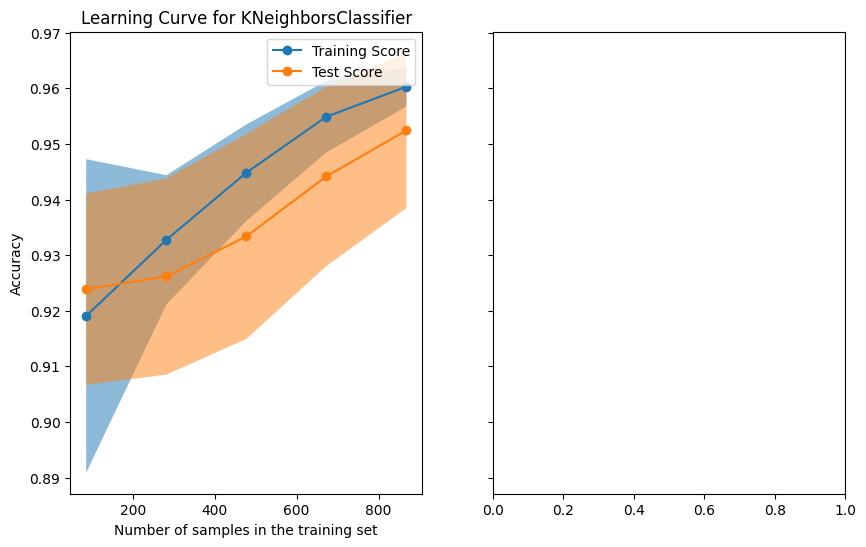

In [ ]:
#learning curve for knn

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([knn]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")


In [ ]:
#Logistic regression

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=3000)
model.fit(X_train,y_train)


#predict
y_pred=model.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))


confusion matrix [[247   4]
 [ 10  11]]
Accuracy: 0.9485294117647058
F1 score: 0.611111111111111
Recall: 0.5238095238095238
Precision: 0.7333333333333333


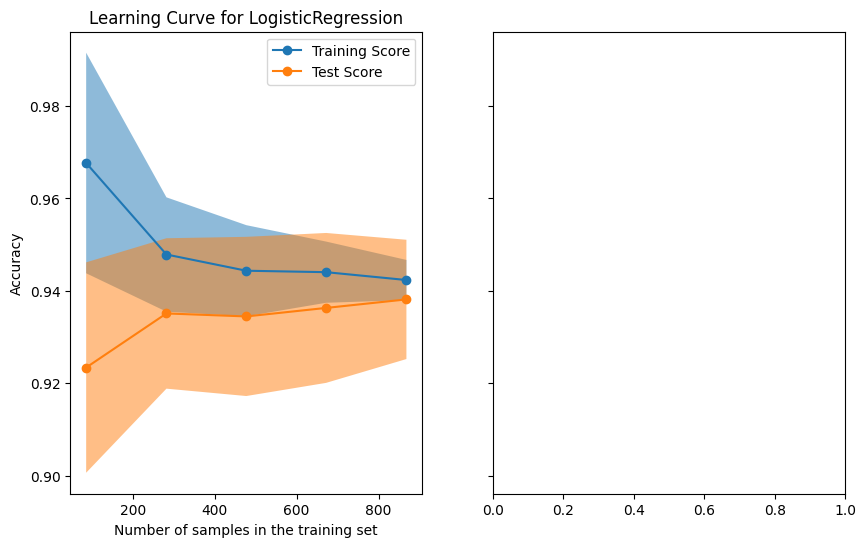

In [ ]:
#learning curve for Logistic Regression
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([model]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
# SVM classifier

from sklearn.svm import SVC
svm = SVC(kernel='linear')

# fitting x samples and y classes
svm.fit(X_train, y_train)

y_pred=svm.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))



confusion matrix [[247   4]
 [ 12   9]]
Accuracy: 0.9411764705882353
F1 score: 0.5294117647058824
Recall: 0.42857142857142855
Precision: 0.6923076923076923


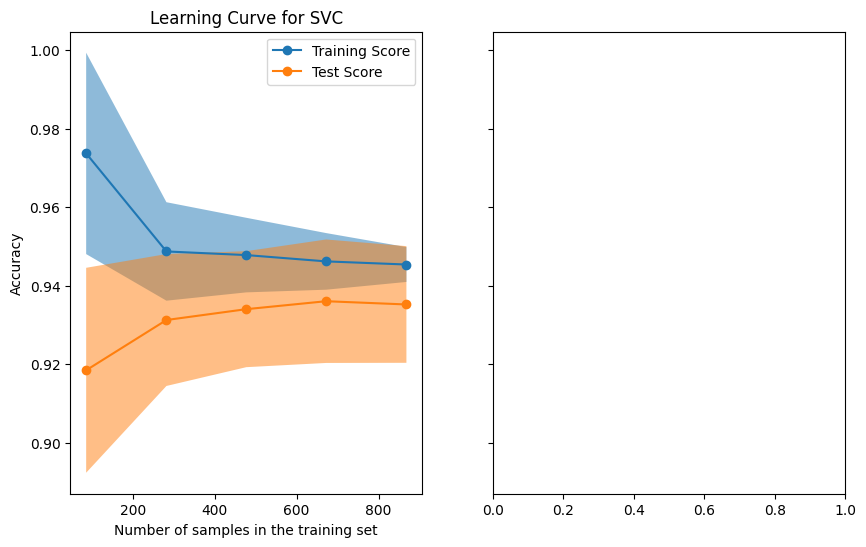

In [ ]:
#learning curve for svm

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([svm]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))



confusion matrix [[251   0]
 [  2  19]]
Accuracy: 0.9926470588235294
F1 score: 0.9500000000000001
Recall: 0.9047619047619048
Precision: 1.0


KeyboardInterrupt: ignored

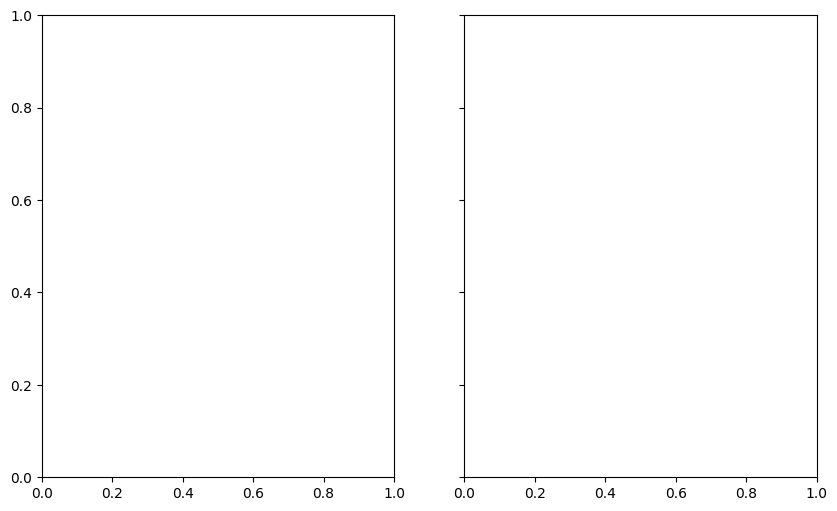

In [ ]:
#learning curve for decision tree

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([dtree]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# hybrid RFLR
from sklearn.linear_model import LogisticRegression
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit a hybrid random forest logistic regression model
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Use the random forest to generate new features for logistic regression
rf_features = rf.apply(X_train)
X_train_new = X_train.copy()
X_train_new = np.concatenate((X_train_new, rf_features), axis=1)

# Fit a logistic regression model on the new features
lr = LogisticRegression(random_state=42)
lr.fit(X_train_new, y_train)

# Use the random forest and logistic regression models to make predictions on the test set
rf_features_test = rf.apply(X_test)
X_test_new = X_test.copy()
X_test_new = np.concatenate((X_test_new, rf_features_test), axis=1)
y_pred = lr.predict(X_test_new)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))

Accuracy: 0.9815668202764977
F1 score: 0.8750000000000001
Recall: 0.7777777777777778
Precision: 1.0


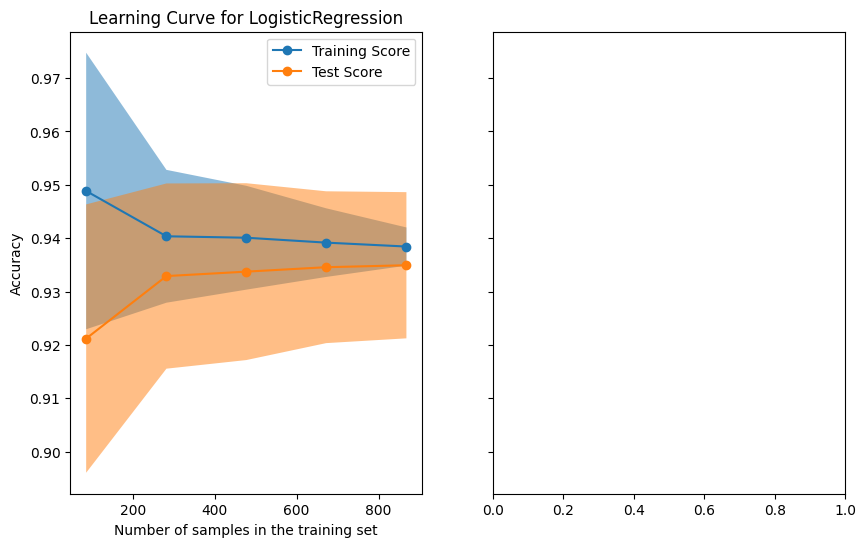

In [ ]:
#learning curve for hybrid rflr

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([lr]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
#KMEANS

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(x)

from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=2): {silhouette_score(x,y_kmeans)}')

from sklearn.metrics import davies_bouldin_score
print(f'davies_bouldin_score(n=2): {davies_bouldin_score(x,y_kmeans)}')

Silhouette Score(n=2): 0.6862256300085825
davies_bouldin_score(n=2): 0.37144408680635255


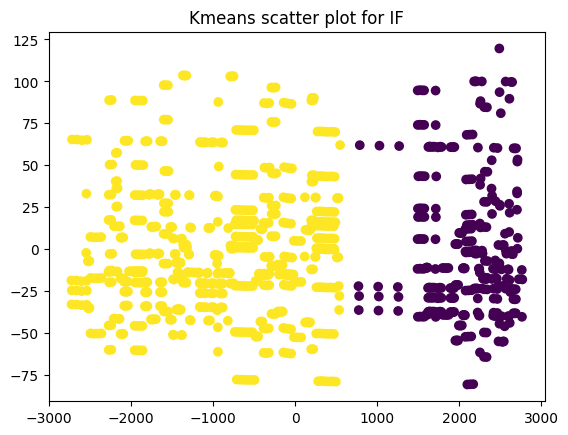

In [ ]:
#scatter plot for Kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pcaval= pca.fit_transform(data)

kmeans = KMeans(n_clusters=2)
kmeans.fit(pcaval)
xpca=pcaval[:,0]
ypca=pcaval[:,1]

plt.scatter(xpca,ypca, c=kmeans.labels_)
plt.title("Kmeans scatter plot for IF")
plt.show()

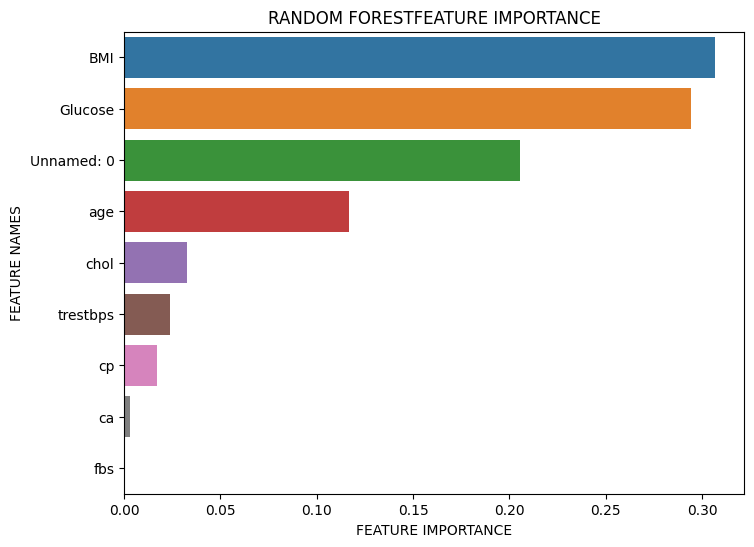

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(8,6))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST')

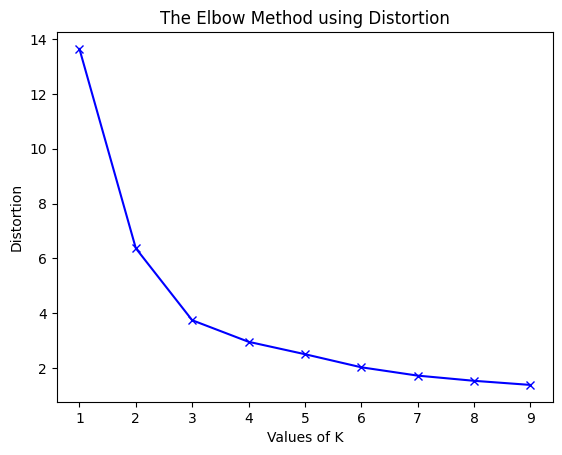

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)

    distortions.append(((sum(np.min(cdist(x, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / x.shape[0])/100))
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()